In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,8)
import datetime

# I. Detecting jumps

In [6]:
def import_data(ticker, start_date, end_date):
    import yfinance as yf
    data = yf.Ticker(ticker)
    data = data.history(period="max")
    data['Return'] = data['Close'].pct_change()
    data = data.loc[data.index >= start_date]
    data = data.loc[data.index <= end_date]
    
    return data

def daily2weekly(data):
    data['WeeklyReturn'] = (1+data.Return).resample('W-FRI').prod()-1
    return data


def detect_jumps(data, k):
    
    jump_dates = []
    
    
    for n in range(2, len(data)):
        x = data.Return.iloc[0:n]
        mu = 1/n * sum(x)
        sigma = np.sqrt(1/(n-1) * sum([(j - mu)**2 for j in x]))
        if data.Return.iloc[n] > mu + k * sigma or data.Return.iloc[n] < mu - k * sigma :
            date = data.index[n]
            jump_dates.append(date)
            
    return jump_dates


def plot_jumps(data, k):
    jumps = detect_jumps(data, k)
    for jump in jumps:
        plt.plot(data.Close, color='blue')
        plt.axvline(x=jump, color='red', linestyle='--')
        plt.title('Stock Price (EUR) evolution')
        plt.xlabel('Price (EUR)')
        plt.ylabel('Date')

# II. Transition shocks

In [3]:
tickers = ['UG.PA', 'RNO.PA', 'VOW3.DE', 'NSU.DE', 'BMW.DE', 
          'ALO.PA', 'EDF.PA', 'ENGI.PA', 'EBK.DE', 'RWE.DE',
          'LHA.DE', 'AF.PA']
FR_companies = ['UG.PA', 'RNO.PA','ALO.PA', 'EDF.PA', 'ENGI.PA', 'AF.PA',
               'FP.PA', 'SEV.PA', 'HO.PA', 'SU.PA', 'ML.PA', 'AM.PA',
               'AIR.PA', 'ADP.PA', 'AI.PA', 'VIE.PA']
GER_companies = ['VOW3.DE', 'NSU.DE', 'BMW.DE', 'EBK.DE', 'RWE.DE', 'LHA.DE']
FR_ann_date = datetime.datetime.strptime('21-09-2013', '%d-%m-%Y')
FR_vote_date = datetime.datetime.strptime('29-12-2013','%d-%m-%Y')
FR_impl_date = datetime.datetime.strptime('01-04-2014','%d-%m-%Y')
GER_ann_date = datetime.datetime.strptime('23-10-2019', '%d-%m-%Y')

In [19]:
ann_max = FR_ann_date + datetime.timedelta(days=5)
vote_max = FR_vote_date + datetime.timedelta(days=5)
impl_max = FR_impl_date + datetime.timedelta(days=5)
for ticker in FR_companies:
    data = import_data(ticker=ticker, start_date='2013-01-01', end_date='2014-12-31')
    jump_dates = detect_jumps(data, k=2)
    for dates in jump_dates:
        jump_date = datetime.datetime.strptime(str(dates), '%Y-%m-%d %H:%M:%S')
        if jump_date >= FR_ann_date and jump_date <= ann_max or jump_date >= FR_vote_date and jump_date <= vote_max or jump_date >= FR_impl_date and jump_date <= vote_max:
            print('Company: ' + ticker, ' Date of the jump: ' + str(jump_date))
        
        

Company: FP.PA  Date of the jump: 2013-09-24 00:00:00


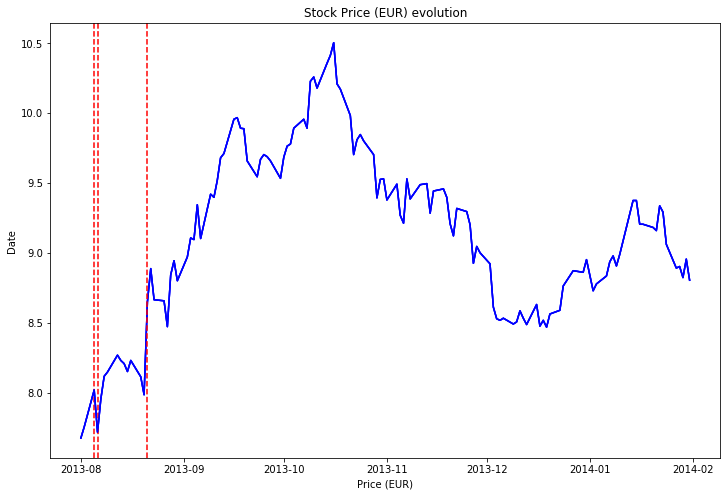

In [28]:
plot_jumps(import_data('VIE.PA', start_date='2013-08-01', end_date='2014-01-31'), 2 )
plt.savefig('StockPriceFP.png')

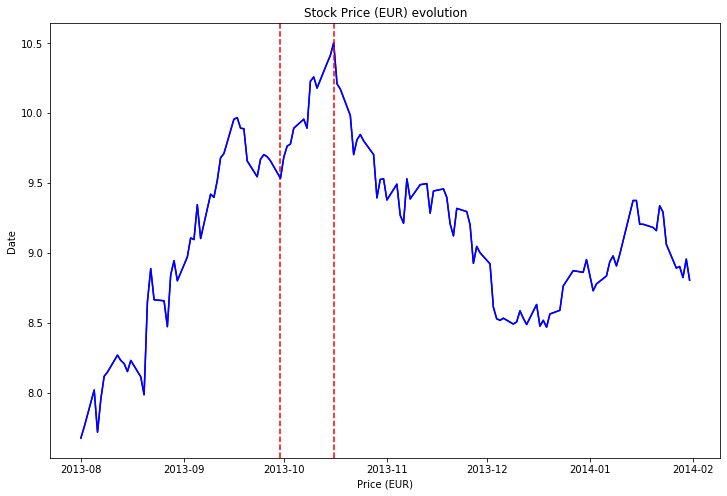

In [44]:
data = import_data('VIE.PA', start_date='2013-08-01', end_date='2014-01-31')
for jumps in [data.index[42], data.index[54]]:
    plt.plot(data.Close, color='blue')
    plt.axvline(x=jumps, color='red', linestyle='--')
    plt.title('Stock Price (EUR) evolution')
    plt.xlabel('Price (EUR)')
    plt.ylabel('Date')
    plt.savefig('VIE_stock.png')

In [37]:
data.iloc[40:47]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return
Date,,,,,,,,
2013-09-26,9.677219,9.714976,9.507311,9.688546,1723860,0.0,0,-0.001556
2013-09-27,9.692324,9.756512,9.616809,9.658342,1978383,0.0,0,-0.003117
2013-09-30,9.552620,9.613032,9.458227,9.533742,1860452,0.0,0,-0.012901
2013-10-01,9.514863,9.718752,9.484657,9.684771,1796008,0.0,0,0.015841
2013-10-02,9.650788,9.884885,9.650788,9.764061,1533113,0.0,0,0.008187
2013-10-03,9.756510,9.801819,9.696098,9.779164,1538692,0.0,0,0.001547
2013-10-04,9.733856,9.964176,9.726304,9.892437,1673896,0.0,0,0.011583


In [5]:
ann_max = GER_ann_date + datetime.timedelta(days=2)
for ticker in GER_companies:
    data = import_data(ticker=ticker, start_date='2019-01-01', end_date='2019-12-31')
    jump_dates = detect_jumps(data)
    for dates in jump_dates:
        jump_date = datetime.datetime.strptime(str(dates), '%Y-%m-%d %H:%M:%S')
        if jump_date >= GER_ann_date and jump_date <= ann_max:
            print('Company: ' + ticker, ' Date of the jump: ' + str(jump_date))

Company: NSU.DE  Date of the jump: 2019-10-23 00:00:00


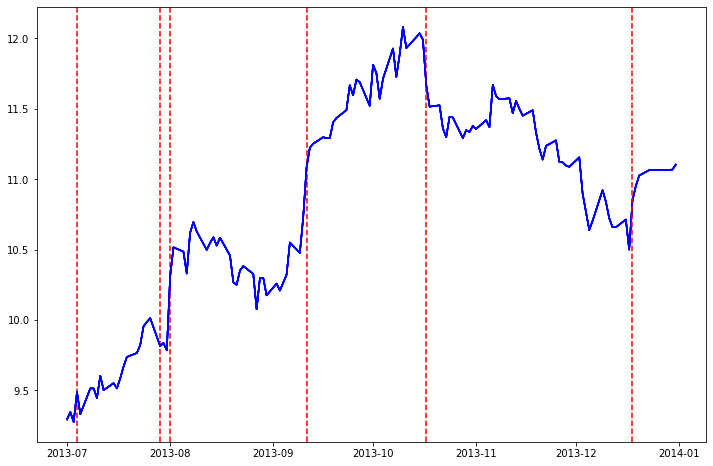

In [47]:
plot_jumps(import_data(ticker='ENGI.PA', start_date='29-06-2013', end_date='01-01-2014'))

In [34]:
np.mean(import_data(ticker='ENGI.PA', start_date='29-06-2013', end_date='01-01-2014').Close)

10.826613257481501

In [35]:
np.std(import_data(ticker='ENGI.PA', start_date='29-06-2013', end_date='01-01-2014').Close)

0.7354599663120308

In [36]:
10*0.73

7.3

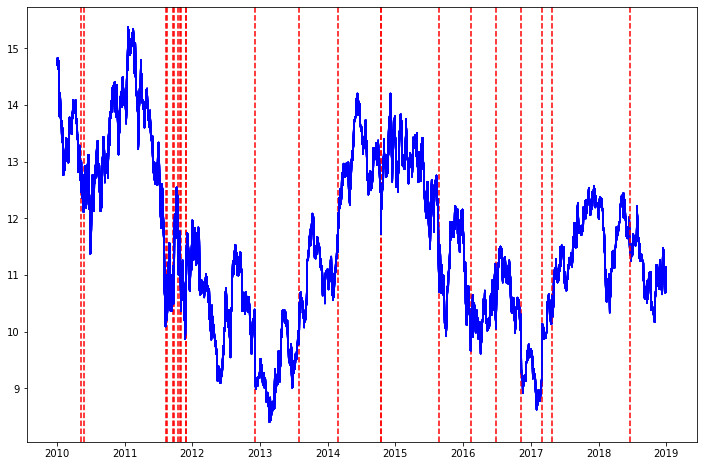

In [61]:
plot_jumps(import_data(ticker='ENGI.PA', start_date='01-01-2010', end_date='01-01-2019'))

In [14]:
0.006/0.0002

30.0

In [29]:

abs(import_data(ticker='ENGI.PA', start_date='29-10-2013', end_date='01-01-2014').Return.iloc[25] / import_data(ticker='ENGI.PA', start_date='29-10-2013', end_date='01-01-2014').Return.iloc[24])



3.73887623753088

In [30]:
import_data(ticker='ENGI.PA', start_date='29-10-2013', end_date='01-01-2014').Return.iloc[24:26]

Date
2013-12-02    0.006151
2013-12-03   -0.022999
Name: Return, dtype: float64

In [32]:
0.02/0.006

3.3333333333333335

In [9]:
ann_max = GER_ann_date + datetime.timedelta(days=2)
for ticker in GER_companies:
    data = import_data(ticker=ticker, start_date='2019-01-01', end_date='2019-12-31')
    jump_dates = detect_jumps2(data)
    for dates in jump_dates:
        jump_date = datetime.datetime.strptime(str(dates), '%Y-%m-%d %H:%M:%S')
        if jump_date >= GER_ann_date and jump_date <= ann_max:
            print('Company: ' + ticker, ' Date of the jump: ' + str(jump_date))
        

Company: VOW3.DE  Date of the jump: 2019-10-24 00:00:00
Company: EBK.DE  Date of the jump: 2019-10-23 00:00:00


In [60]:
def detect_jumps2(data):
    
    jump_dates = []
    mu = np.mean(data.Return)
    
    for n in range(1, len(data)):
        if abs(data.Return.iloc[n]) > 5 * abs(data.Return.iloc[n-1]):
            date = data.index[n]
            jump_dates.append(date)
    return jump_dates

In [21]:
import_data('NSU.DE', '2019-01-01', '2019-12-31').Return.iloc[0:10]

Date
2019-01-02    0.002558
2019-01-03   -0.002551
2019-01-04   -0.015345
2019-01-07    0.000000
2019-01-08    0.005195
2019-01-09   -0.005168
2019-01-10    0.000000
2019-01-11   -0.007792
2019-01-14    0.000000
2019-01-15    0.000000
Name: Return, dtype: float64

In [25]:
np.mean(import_data('NSU.DE', '2019-01-01', '2019-12-31').Return)*50

0.007150033621663434

In [50]:
detect_jumps2(import_data('RNO.PA', '2019-01-01', '2019-12-31'))

[Timestamp('2019-01-04 00:00:00'),
 Timestamp('2019-01-08 00:00:00'),
 Timestamp('2019-01-11 00:00:00'),
 Timestamp('2019-01-16 00:00:00'),
 Timestamp('2019-01-23 00:00:00'),
 Timestamp('2019-01-25 00:00:00'),
 Timestamp('2019-01-31 00:00:00'),
 Timestamp('2019-02-07 00:00:00'),
 Timestamp('2019-02-14 00:00:00'),
 Timestamp('2019-02-20 00:00:00'),
 Timestamp('2019-02-22 00:00:00'),
 Timestamp('2019-02-25 00:00:00'),
 Timestamp('2019-03-06 00:00:00'),
 Timestamp('2019-03-15 00:00:00'),
 Timestamp('2019-03-27 00:00:00'),
 Timestamp('2019-04-11 00:00:00'),
 Timestamp('2019-04-17 00:00:00'),
 Timestamp('2019-05-03 00:00:00'),
 Timestamp('2019-05-09 00:00:00'),
 Timestamp('2019-05-20 00:00:00'),
 Timestamp('2019-05-27 00:00:00'),
 Timestamp('2019-05-31 00:00:00'),
 Timestamp('2019-06-04 00:00:00'),
 Timestamp('2019-06-06 00:00:00'),
 Timestamp('2019-06-17 00:00:00'),
 Timestamp('2019-06-18 00:00:00'),
 Timestamp('2019-06-21 00:00:00'),
 Timestamp('2019-06-28 00:00:00'),
 Timestamp('2019-07-

In [54]:
def plot_jumps2(data):
    jumps = detect_jumps2(data)
    for jump in jumps:
        plt.plot(data.Close, color='blue')
        plt.axvline(x=jump, color='red', linestyle='--')

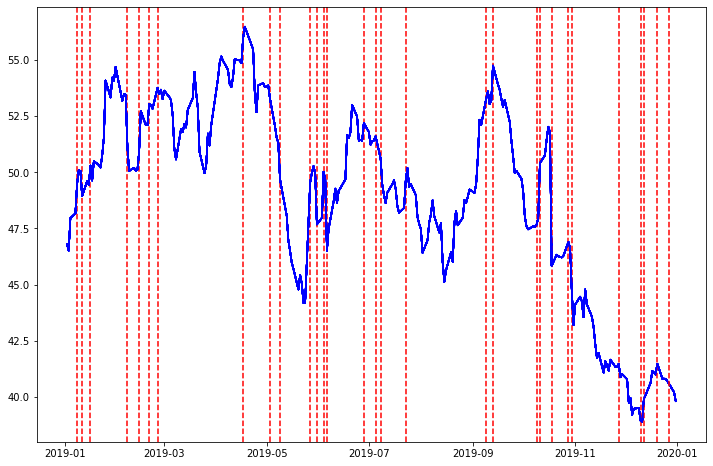

In [61]:
plot_jumps2(import_data('RNO.PA', '2019-01-01', '2019-12-31'))

# III. Physical shocks